<a href="https://colab.research.google.com/github/VedKate/Vedeneeva_Ekaterina_RT5/blob/main/BMSTU_TMO_2022/%D0%9B%D0%A0/%D0%9B%D0%A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ

Веденеева Е.И. РТ5-61Б

Выбран датасет "Student's math score for different teaching style"
https://www.kaggle.com/datasets/soumyadiptadas/students-math-score-for-different-teaching-style



# Задание

Создать ноутбук, который содержит следующие разделы:

Текстовое описание выбранного Вами набора данных.\
Основные характеристики датасета.\
Визуальное исследование датасета.\
Информация о корреляции признаков.

# Подключение диска и необходимых библиотек

Mounted at /content/drive


In [ ]:
!pip install pyreadstat # нужен для чтения .sav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 19.8 MB/s 


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загрузка датасета и получение информации о нем

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/1ResearchProjectData.sav'
df = pd.read_spss(filename)
df1 = df

Посмотрим несколько первы строк 

In [ ]:
df.head(10)

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith
5,6.0,Ruger,Male,Caucasian,Paid lunch,58.0,Ruger_Smith
6,7.0,Ruger,Female,African-American,Paid lunch,62.0,Ruger_Smith
7,8.0,Ruger,Male,Hispanic,Free lunch,40.0,Ruger_Smith
8,9.0,Ruger,Female,African-American,Free lunch,82.0,Ruger_Smith
9,10.0,Ruger,Male,African-American,Paid lunch,78.0,Ruger_Smith


**Описание набора данных:**
* Student - порядковый номер учащегося
* Teacher - фамилия преподавателя
* Gender - пол учащегося
* Ethnic - этническая принадлежность учащегося
* Freeredu - наличие льготы на питание
* Score - оценка (по стобальной шкале)
* wesson - условное обозначения метода преподавания


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    217 non-null    category
dtypes: category(5), float64(2)
memory usage: 5.3 KB


Поиск и исключение пустых значений

In [ ]:
df.isnull().sum()

Student     1
Teacher     1
Gender      1
Ethnic      1
Freeredu    1
Score       1
wesson      0
dtype: int64

In [ ]:
df.dropna(inplace = True)

Проверим наличие нулевых значений

In [ ]:
df.isnull().sum()

Student     0
Teacher     0
Gender      0
Ethnic      0
Freeredu    0
Score       0
wesson      0
dtype: int64

Далее проверим наличие дубликатов:

In [ ]:
print(df['Student'].unique().size)
print(df.shape[0])

216
216


Дубликатов нет.

# Добавление колонки "Method"

В аннотоции указало, что одна из преподавательниц придерживается традиционного метода в обучении, а две другие использют standards-based method. Условно это отражено в колонке wesson, но для удобства добавим колонку с более понятным разделением.

In [ ]:
df['Method'] = df['wesson'].apply(lambda x: 'Standard' if 'Ruger_Smith' in x else 'Traditional')

In [ ]:
df.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson,Method
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith,Standard
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith,Standard
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith,Standard
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith,Standard
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith,Standard


Посмотрим точное количество учениеков, обуающихся по каждому методу

In [ ]:
df.Method.value_counts()

Standard       140
Traditional     76
Name: Method, dtype: int64

# Анализ датасета

Посмотрим общее распределение баллов:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


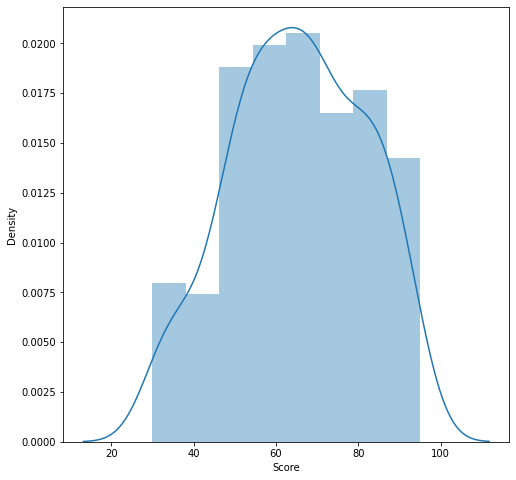

In [ ]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.distplot(df['Score'])

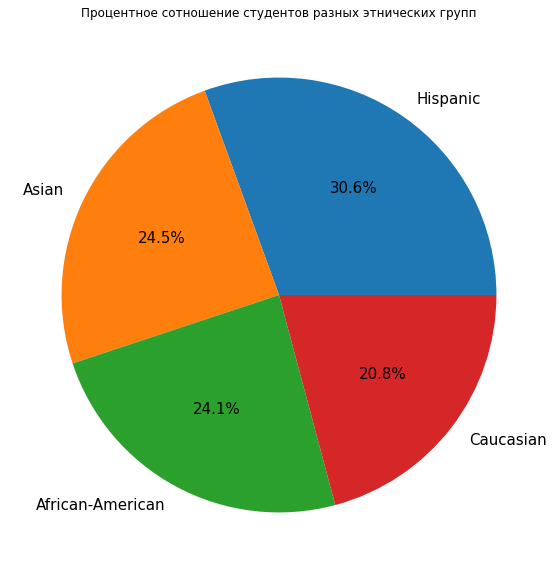

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(df.Ethnic.value_counts().values, labels = df.Ethnic.value_counts().index, autopct = '%2.1f%%', textprops={'fontsize': 15})
plt.title('Процентное сотношение студентов разных этнических групп')
plt.show()

Посчитаем количество студентов обоих полов в каждой этнической группе:

In [ ]:
grouped_eth = pd.pivot_table(df, index = 'Ethnic', columns = 'Gender', aggfunc = 'count', values = 'Score')
print(grouped_eth)

Gender            Female  Male
Ethnic                        
African-American      20    32
Asian                 26    27
Caucasian             19    26
Hispanic              31    35


In [ ]:
aver_gen_eth_score = pd.pivot_table(df, index = 'Gender', columns = 'Ethnic', values = 'Score')
print(aver_gen_eth_score)

Ethnic  African-American      Asian  Caucasian   Hispanic
Gender                                                   
Female          66.05000  68.384615  70.631579  66.258065
Male            66.34375  63.111111  59.730769  63.542857


Text(0, 0.5, 'Количество учащихся')

<Figure size 2880x2880 with 0 Axes>

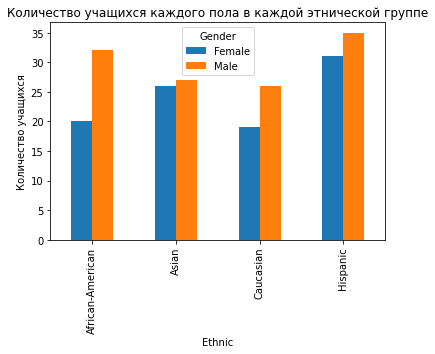

In [ ]:
plt.figure(figsize = (40,40))
grouped_eth.plot(kind = 'bar')
plt.title('Количество учащихся каждого пола в каждой этнической группе')
plt.ylabel('Количество учащихся')

Теперь рассмотрим влияние разных факторов на средний балл:

1. Средний балл учеников в каждом из методов:

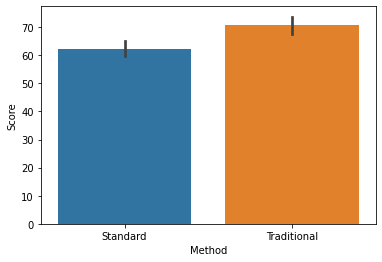

In [ ]:
sns.barplot(x = 'Method', y = 'Score', data = df) # первая версия

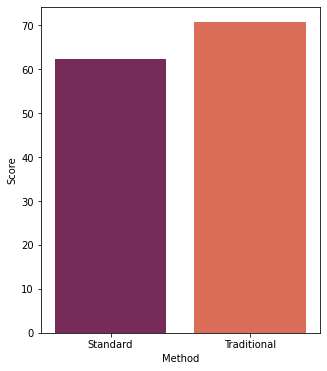

In [ ]:
plt.figure(figsize=(5,6))
sns.barplot(x = 'Method', y = 'Score', data = df, ci = None, palette = 'rocket')

In [ ]:
print('Средний балл для традиционного метода: {:.2f}'.format(np.mean(df.Score[df.Method == 'Traditional'])))
print('Средний балл для метода "Standard": {:.2f}'.format(np.mean(df.Score[df.Method == 'Standard'])))

Средний балл для традиционного метода: 70.68
Средний балл для метода "Standard": 62.34


Теперь посмотрим средний балл в каждой этнической группе:

In [ ]:
np.round(aver_gen_eth_score,1)
print(aver_gen_eth_score)
# минутка мучений с форматированием вывода
np.round(pd.pivot_table(df, index = 'Gender', columns = 'Ethnic', values = 'Score'), 2)


Ethnic  African-American      Asian  Caucasian   Hispanic
Gender                                                   
Female          66.05000  68.384615  70.631579  66.258065
Male            66.34375  63.111111  59.730769  63.542857


Ethnic,African-American,Asian,Caucasian,Hispanic
Gender,,,,
Female,66.05,68.38,70.63,66.26
Male,66.34,63.11,59.73,63.54


**Визувлизация**

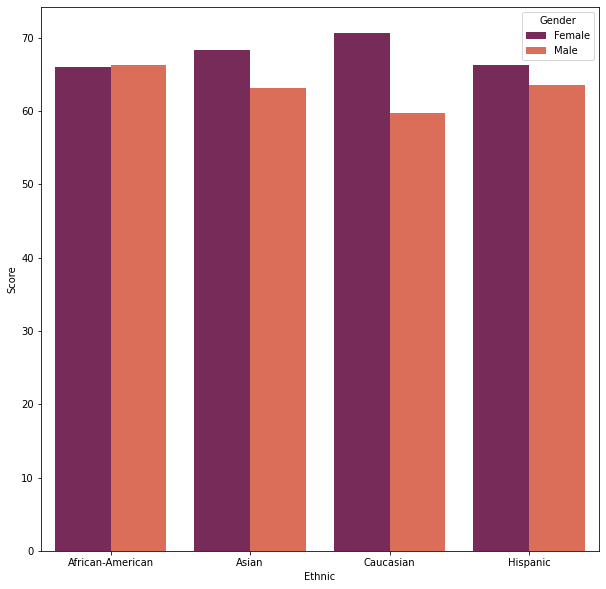

In [ ]:
plt.figure(figsize=(10,10))
#sns.barplot(x = 'Ethnic', y = 'Score', hue = 'Gender', ci = None, palette = 'rocket' ) - а источник данных где????
sns.barplot(x = 'Ethnic', y = 'Score', hue = 'Gender', data = df, ci = None, palette = 'rocket') # вот теперь есть


Добавим название: 

Text(0.5, 1.0, 'Средний балл в каждой этнической группе')

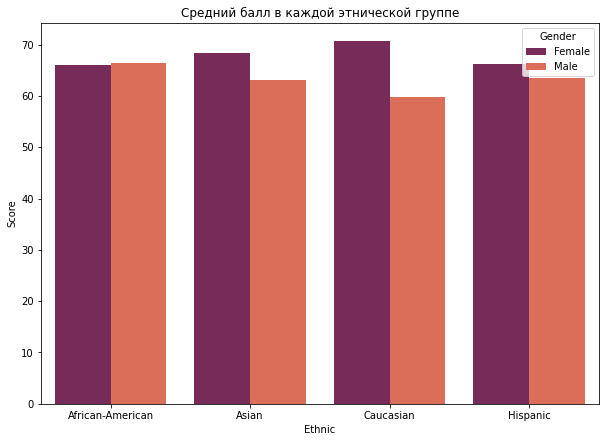

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Ethnic', y = 'Score', hue = 'Gender', data = df, ci = None, palette = 'rocket')
plt.title('Средний балл в каждой этнической группе')

In [ ]:
# сначала разделим датасет на две части (по методу обучения)
#df_traditional = df[df.Method == 'Traditional']
#df_standard = df[df.Method == 'Standard']

**Корреляционная матрица:**

In [ ]:
le = LabelEncoder()
df_fited = df

df_fited['Ethnic'] = le.fit_transform(df['Ethnic'])
df_fited['Teacher'] = le.fit_transform(df['Teacher'])
df_fited['Gender'] = le.fit_transform(df['Gender'])
df_fited['Freeredu'] = le.fit_transform(df['Freeredu'])
df_fited['wesson'] = le.fit_transform(df['wesson'])



In [ ]:
df_fited.head(10)

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,0,0,1,0,76.0,0
1,2.0,0,0,3,1,56.0,0
2,3.0,0,0,0,0,34.0,0
3,4.0,0,0,1,1,59.0,0
4,5.0,0,1,3,0,73.0,0
5,6.0,0,1,2,1,58.0,0
6,7.0,0,0,0,1,62.0,0
7,8.0,0,1,3,0,40.0,0
8,9.0,0,0,0,0,82.0,0
9,10.0,0,1,0,1,78.0,0


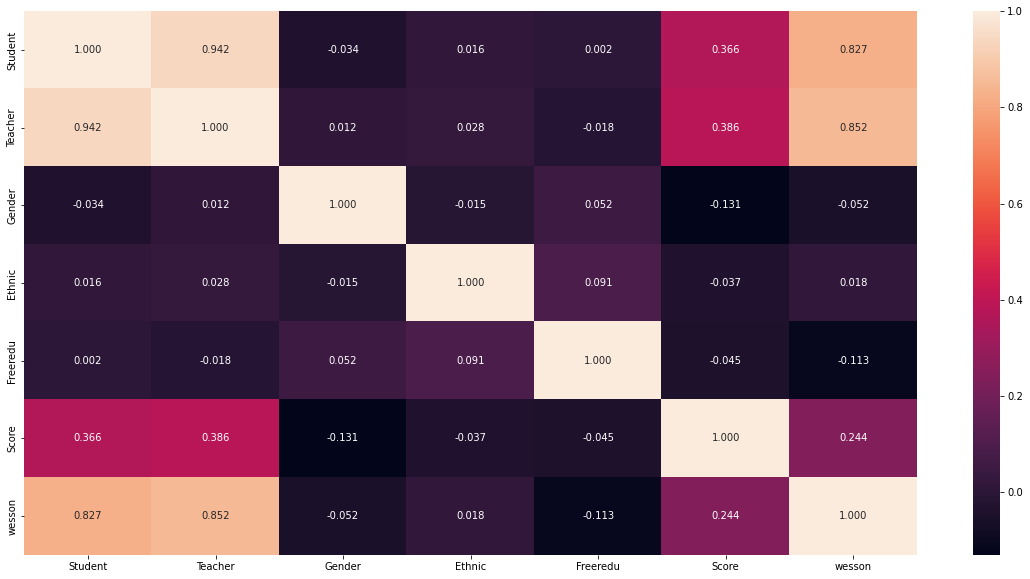

In [ ]:
ig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(method='pearson'), ax=ax, annot=True, fmt='.3f')

**Выводы**\

Примерно равные этнические группы.
Средний балл выше у традиционаотного метода. \
Девочки имеют средний балл выше, чем мальчики

Корреляция балла с методом очень слабая (0,024)\
Корреляция мбалла с преподавателем слабая (0,386)

